# A project on Prediction of Product Coupon Code whether is valid or invalid

# Feature Details

In [1]:
#Importing Liabraries

In [2]:

#Basic and Numerical

import pandas as pd
import numpy as np
import lazypredict
from lazypredict.Supervised import LazyClassifier

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix

from scipy.stats import shapiro, skew, kstest, normaltest


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')



# 1.Problem Statement

To identify whether the printed product coupan code is valid or invalid by using some important parameter

In [3]:
test_accuracy_list=[]
train_accuracy_list= []
model_name_list =[]

# 2.Data Gathering

Data is provided by company side/client side in Excel sheet format

In [4]:
df = pd.read_excel("jsw.xlsx")
df

,Manufacturing_Plant,Plant,Hub_Location,ASM,Brand,Surface,Pack,Price,Year,Awarded_points,Remark
0,Bellary,One,Aurangabad,Rahul,ASI,INTERIOR,20,9140,2019,87.00,Yes
1,Bellary,One,Aurangabad,Rahul,ASI,INTERIOR,20,9140,2019,87.00,Yes
2,Bellary,One,Aurangabad,Rahul,ASI,INTERIOR,20,9140,2022,87.00,Yes
3,Bellary,One,Aurangabad,Rahul,ASI,INTERIOR,20,9140,2022,87.00,Yes
4,Bellary,One,Aurangabad,Rahul,ASI,INTERIOR,20,9140,2022,87.00,Yes
...,...,...,...,...,...,...,...,...,...,...,...
700,Bellary,Five,Nashik,Sandip,IWP,INTERIOR,1,235,2020,2.20,No
701,Bellary,Five,Nashik,Sandip,IWP,INTERIOR,1,235,2020,2.20,No
702,Bellary,Five,Nashik,Sandip,IWP,INTERIOR,20,3740,2020,35.60,Yes
703,Bellary,Five,Nashik,Sandip,IWP,INTERIOR,20,3740,2020,35.60,Yes


# 3.Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturing_Plant  705 non-null    object 
 1   Plant                705 non-null    object 
 2   Hub_Location         705 non-null    object 
 3   ASM                  705 non-null    object 
 4   Brand                705 non-null    object 
 5   Surface              705 non-null    object 
 6   Pack                 705 non-null    int64  
 7   Price                705 non-null    int64  
 8   Year                 705 non-null    int64  
 9   Awarded_points       705 non-null    float64
 10  Remark               705 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 60.7+ KB


# 4.Feature Engiineering

# Manufacturing_Plant

In [6]:
df['Manufacturing_Plant'].value_counts()

Bellary    591
Vasind     114
Name: Manufacturing_Plant, dtype: int64

In [7]:
df=pd.get_dummies(df,columns=['Manufacturing_Plant'])

# Plant

In [8]:
df['Plant'].replace({'One':1,'Two':2,'Three':3,'Four':4,'Five':5},inplace=True)

In [9]:
Plant_dict = {'One':1,'Two':2,'Three':3,'Four':4,'Five':5}
Plant_dict

{'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

# Hub_Location

In [10]:
df=pd.get_dummies(df,columns=['Hub_Location'])

# ASM

In [11]:
df['ASM'].value_counts()

Jayprakash     253
Rahul          232
Saurabh        114
Sandip          76
Vinay           30
Name: ASM, dtype: int64

In [12]:
df.drop(['ASM'],axis=1,inplace=True)

# Surface

In [13]:
df['Surface'].replace({'INTERIOR ':0,'EXTERIOR':1,},inplace=True)

In [14]:
Surface_dict = {'INTERIOR': 0,'EXTERIOR': 1}
Surface_dict

{'INTERIOR': 0, 'EXTERIOR': 1}

In [15]:
df['Surface'].value_counts()

0    440
1    265
Name: Surface, dtype: int64

# Pack

In [16]:
df['Pack'].value_counts()

1     315
20    175
4     124
10     91
Name: Pack, dtype: int64

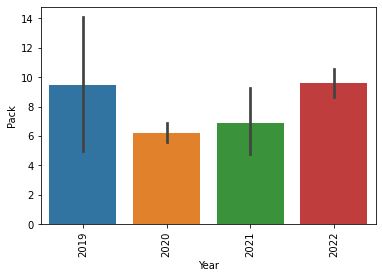

In [17]:
sns.barplot(x=df['Year'],y=df['Pack'])
plt.xticks(rotation='vertical')
plt.show()

In [18]:
df['Pack'].head()

0    20
1    20
2    20
3    20
4    20
Name: Pack, dtype: int64

# Price

In [19]:
df['Price'].value_counts().head()

450     91
455     61
1735    41
3740    38
630     36
Name: Price, dtype: int64

# Year

In [20]:
df['Year'].value_counts().head()

2020    420
2022    225
2021     47
2019     13
Name: Year, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

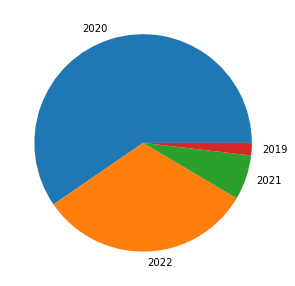

In [21]:
Year=['2020','2022','2021','2019']
count = [420,225,47,13]
fig=plt.figure(figsize=(5,5))
plt.pie(count,labels=Year)
plt.show
                   

# Awarded_points

In [22]:
df['Awarded_points'].value_counts().head()

2.70     79
4.30     61
4.25     46
10.00    40
6.00     36
Name: Awarded_points, dtype: int64

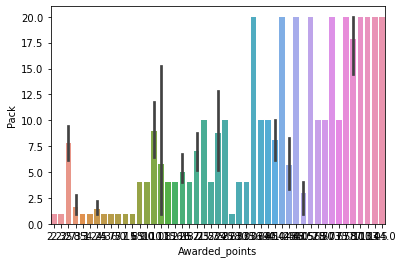

<Figure size 720x720 with 0 Axes>

In [23]:
sns.barplot(x=df['Awarded_points'],y=df['Pack'])
plt.xticks(rotation='horizontal')
fig=plt.figure(figsize=(10,10))
plt.show()

# Remark

In [24]:
df['Remark'].value_counts().to_dict()

{'Yes': 384, 'No': 321}

In [25]:
df['Remark'].replace({'Yes':1, 'No':0},inplace=True)
df

,Plant,Brand,Surface,Pack,Price,Year,Awarded_points,Remark,Manufacturing_Plant_Bellary,Manufacturing_Plant_Vasind,Hub_Location_Aurangabad,Hub_Location_Goa,Hub_Location_Kolhapur,Hub_Location_Nagpur,Hub_Location_Nashik
0,1,ASI,0,20,9140,2019,87.00,1,1,0,1,0,0,0,0
1,1,ASI,0,20,9140,2019,87.00,1,1,0,1,0,0,0,0
2,1,ASI,0,20,9140,2022,87.00,1,1,0,1,0,0,0,0
3,1,ASI,0,20,9140,2022,87.00,1,1,0,1,0,0,0,0
4,1,ASI,0,20,9140,2022,87.00,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,5,IWP,0,1,235,2020,2.20,0,1,0,0,0,0,0,1
701,5,IWP,0,1,235,2020,2.20,0,1,0,0,0,0,0,1
702,5,IWP,0,20,3740,2020,35.60,1,1,0,0,0,0,0,1
703,5,IWP,0,20,3740,2020,35.60,1,1,0,0,0,0,0,1


# Brand

In [26]:
df=pd.get_dummies(df,columns=['Brand'])
df

,Plant,Surface,Pack,Price,Year,Awarded_points,Remark,Manufacturing_Plant_Bellary,Manufacturing_Plant_Vasind,Hub_Location_Aurangabad,...,Brand_AI,Brand_ASI,Brand_EWP,Brand_HE,Brand_HI,Brand_HSI,Brand_IBWPE,Brand_IBWPI,Brand_IBWR,Brand_IWP
0,1,0,20,9140,2019,87.00,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,20,9140,2019,87.00,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,20,9140,2022,87.00,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,0,20,9140,2022,87.00,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,0,20,9140,2022,87.00,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,5,0,1,235,2020,2.20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
701,5,0,1,235,2020,2.20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
702,5,0,20,3740,2020,35.60,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
703,5,0,20,3740,2020,35.60,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Plant                        705 non-null    int64  
 1   Surface                      705 non-null    int64  
 2   Pack                         705 non-null    int64  
 3   Price                        705 non-null    int64  
 4   Year                         705 non-null    int64  
 5   Awarded_points               705 non-null    float64
 6   Remark                       705 non-null    int64  
 7   Manufacturing_Plant_Bellary  705 non-null    uint8  
 8   Manufacturing_Plant_Vasind   705 non-null    uint8  
 9   Hub_Location_Aurangabad      705 non-null    uint8  
 10  Hub_Location_Goa             705 non-null    uint8  
 11  Hub_Location_Kolhapur        705 non-null    uint8  
 12  Hub_Location_Nagpur          705 non-null    uint8  
 13  Hub_Location_Nashik 

# Outlier Handling and Imputation

<AxesSubplot:>

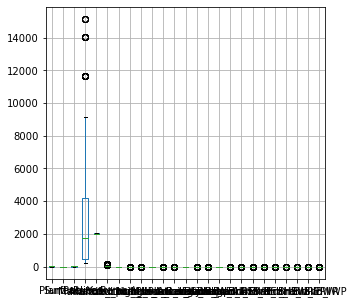

In [28]:
plt.figure(figsize=(5,5))
df.boxplot()

<AxesSubplot:>

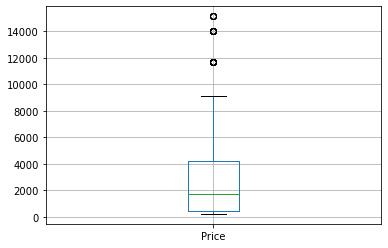

In [29]:
df[['Price']].boxplot()

In [30]:
q1=df['Price'].quantile(0.25)
q2=df['Price'].quantile(0.50)
q3=df['Price'].quantile(0.75)

median=df['Price'].median()

iqr=q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q3-1.5*iqr

print("Q1:",q1)
print("Q2:",q2)
print("Q3:",q3)

print("median:",median)
print("upper_tail:",upper_tail,)
print("lower_tail:",lower_tail,)

Q1: 455.0
Q2: 1735.0
Q3: 4200.0
median: 1735.0
upper_tail: 9817.5
lower_tail: -1417.5


In [31]:
mean_price=df.loc[df['Price']<upper_tail,'Price'].mean()
mean_price

2500.5964653902797

In [32]:
df.loc[df['Price']>upper_tail,'Price']=mean_price

In [33]:
df.loc[df['Price']>upper_tail,'Price']

Series([], Name: Price, dtype: float64)

<AxesSubplot:>

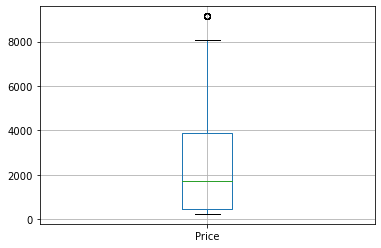

In [34]:
df[['Price']].boxplot()

# 5.Feature Selection

# 6.Model Training

#Assumption in Linear Regression
1.Linearity
2.No multicolinearity
3. Normality of residual 
4.Homoscadasticity

In [35]:
df.corr()

,Plant,Surface,Pack,Price,Year,Awarded_points,Remark,Manufacturing_Plant_Bellary,Manufacturing_Plant_Vasind,Hub_Location_Aurangabad,...,Brand_AI,Brand_ASI,Brand_EWP,Brand_HE,Brand_HI,Brand_HSI,Brand_IBWPE,Brand_IBWPI,Brand_IBWR,Brand_IWP
Plant,1.00,-0.12,0.20,0.03,0.19,-0.02,0.45,-0.23,0.23,-0.40,...,-0.23,-0.24,0.11,0.11,0.25,-0.09,0.04,0.15,0.04,0.48
Surface,-0.12,1.00,0.10,0.06,0.16,0.13,-0.01,-0.35,0.35,0.57,...,-0.47,-0.23,0.37,0.42,-0.27,-0.19,0.14,-0.08,0.17,-0.27
Pack,0.20,0.10,1.00,0.83,0.18,0.65,0.13,-0.22,0.22,-0.06,...,-0.11,-0.06,0.21,-0.05,-0.11,-0.10,0.11,0.05,0.16,0.22
Price,0.03,0.06,0.83,1.00,0.11,0.56,0.07,-0.13,0.13,0.03,...,-0.00,0.02,0.04,-0.07,-0.04,-0.08,0.04,0.02,0.20,-0.02
Year,0.19,0.16,0.18,0.11,1.00,0.02,0.08,-0.61,0.61,0.01,...,0.23,-0.13,0.40,0.20,-0.25,-0.18,0.15,-0.08,0.18,-0.05
Awarded_points,-0.02,0.13,0.65,0.56,0.02,1.00,0.01,-0.03,0.03,0.11,...,-0.10,-0.05,0.02,0.12,0.05,0.03,0.04,0.01,0.14,-0.10
Remark,0.45,-0.01,0.13,0.07,0.08,0.01,1.00,-0.21,0.21,-0.26,...,-0.18,-0.11,0.13,0.23,0.15,0.23,0.10,0.07,-0.14,0.03
Manufacturing_Plant_Bellary,-0.23,-0.35,-0.22,-0.13,-0.61,-0.03,-0.21,1.00,-1.00,0.31,...,0.07,0.06,-0.66,-0.03,0.15,0.11,-0.24,0.05,-0.30,0.15
Manufacturing_Plant_Vasind,0.23,0.35,0.22,0.13,0.61,0.03,0.21,-1.00,1.00,-0.31,...,-0.07,-0.06,0.66,0.03,-0.15,-0.11,0.24,-0.05,0.30,-0.15
Hub_Location_Aurangabad,-0.40,0.57,-0.06,0.03,0.01,0.11,-0.26,0.31,-0.31,1.00,...,-0.09,-0.15,-0.20,0.33,-0.24,-0.17,-0.08,-0.08,-0.09,-0.24


In [36]:
#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr(),annot=True,cmap='rainbow')

In [37]:
#sns.pairplot(df)

In [38]:
x= df.drop('Remark',axis=1)
y= df['Remark']

2.No multicolinearity

<AxesSubplot:>

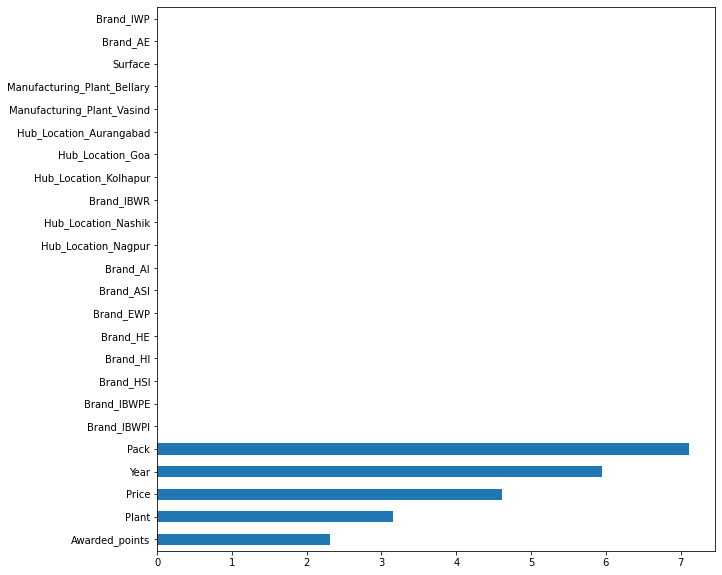

In [39]:

vif_list=[]
for i in range (x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
fig=plt.figure(figsize=(10,10))
s1=pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind="barh")


# Train Test Split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=11)


In [41]:
df['Remark'].value_counts()

1    384
0    321
Name: Remark, dtype: int64

In [42]:
# Accuracy using lazypredict

#clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)

#models,predictions=clf.fit(x_train,y_test,y_train,y_test)
#print(models)

In [43]:
# Create instance 
normal_scalar = MinMaxScaler()

#array = normal_scalar.fit(x_train)
array=normal_scalar.fit_transform(x_train)

x_train_normal = pd.DataFrame(array,columns=x.columns)
x_train_normal



,Plant,Surface,Pack,Price,Year,Awarded_points,Manufacturing_Plant_Bellary,Manufacturing_Plant_Vasind,Hub_Location_Aurangabad,Hub_Location_Goa,...,Brand_AI,Brand_ASI,Brand_EWP,Brand_HE,Brand_HI,Brand_HSI,Brand_IBWPE,Brand_IBWPI,Brand_IBWR,Brand_IWP
0,0.50,1.00,1.00,0.46,1.00,0.28,0.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,1.00,0.39,1.00,0.06,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,0.00,0.00,0.00,0.02,1.00,0.01,1.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.50,1.00,0.00,0.04,0.67,0.03,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.25,0.00,0.16,0.33,0.33,0.20,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0.50,1.00,1.00,0.46,1.00,0.28,0.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
560,0.75,0.00,0.16,0.17,1.00,0.15,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
561,0.00,1.00,0.16,0.17,0.33,0.10,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
562,0.00,1.00,0.00,0.02,0.33,0.01,1.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
# Create instance 
std_scalar = StandardScaler()

array = std_scalar.fit(x_train)
array=std_scalar.transform(x_train)

x_train_std = pd.DataFrame(array,columns=x.columns)
x_train_std

,Plant,Surface,Pack,Price,Year,Awarded_points,Manufacturing_Plant_Bellary,Manufacturing_Plant_Vasind,Hub_Location_Aurangabad,Hub_Location_Goa,...,Brand_AI,Brand_ASI,Brand_EWP,Brand_HE,Brand_HI,Brand_HSI,Brand_IBWPE,Brand_IBWPI,Brand_IBWR,Brand_IWP
0,0.31,1.29,1.64,0.78,1.38,0.56,-2.34,2.34,-0.72,2.34,...,-0.59,-0.29,3.57,-0.33,-0.35,-0.25,-0.10,-0.12,-0.13,-0.34
1,1.79,-0.78,1.64,0.53,1.38,-0.52,0.43,-0.43,-0.72,-0.43,...,-0.59,-0.29,-0.28,-0.33,-0.35,-0.25,-0.10,-0.12,-0.13,2.95
2,-1.17,-0.78,-0.81,-0.82,1.38,-0.71,0.43,-0.43,1.39,-0.43,...,1.68,-0.29,-0.28,-0.33,-0.35,-0.25,-0.10,-0.12,-0.13,-0.34
3,0.31,1.29,-0.81,-0.74,0.33,-0.65,0.43,-0.43,1.39,-0.43,...,-0.59,-0.29,-0.28,3.07,-0.35,-0.25,-0.10,-0.12,-0.13,-0.34
4,-0.43,-0.78,-0.42,0.29,-0.73,0.17,0.43,-0.43,-0.72,-0.43,...,-0.59,-0.29,-0.28,-0.33,-0.35,4.01,-0.10,-0.12,-0.13,-0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0.31,1.29,1.64,0.78,1.38,0.56,-2.34,2.34,-0.72,2.34,...,-0.59,-0.29,3.57,-0.33,-0.35,-0.25,-0.10,-0.12,-0.13,-0.34
560,1.05,-0.78,-0.42,-0.29,1.38,-0.04,-2.34,2.34,-0.72,2.34,...,1.68,-0.29,-0.28,-0.33,-0.35,-0.25,-0.10,-0.12,-0.13,-0.34
561,-1.17,1.29,-0.42,-0.28,-0.73,-0.28,0.43,-0.43,1.39,-0.43,...,-0.59,-0.29,-0.28,-0.33,-0.35,-0.25,-0.10,-0.12,-0.13,-0.34
562,-1.17,1.29,-0.81,-0.81,-0.73,-0.71,0.43,-0.43,1.39,-0.43,...,-0.59,-0.29,-0.28,-0.33,-0.35,-0.25,-0.10,-0.12,-0.13,-0.34


In [45]:
###  (1)  Logistic Regression

In [46]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
#model_name_list.append("Logistic_regression_model")

LogisticRegression()

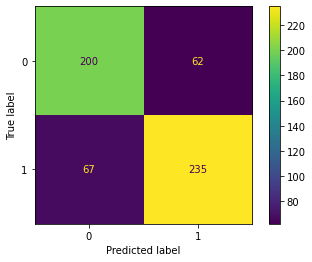

In [47]:
# Training Data
plot_confusion_matrix(logistic_model, x_train, y_train)

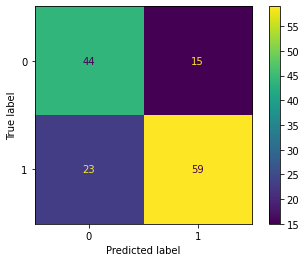

In [48]:
# Training Data
plot_confusion_matrix(logistic_model, x_test, y_test)


# AUC-ROC Curve

In [49]:
# prediction probability
y_pred_proba = logistic_model.predict_proba(x_train)
y_pred_proba[:,1] # We are getting class 1 probability

array([0.87292802, 0.86008665, 0.08250319, 0.78122542, 0.8220745 ,
       0.40713266, 0.4737801 , 0.09177941, 0.44428866, 0.8669492 ,
       0.27328322, 0.28499437, 0.31886107, 0.41683064, 0.86433583,
       0.8669492 , 0.54873556, 0.34491724, 0.27328322, 0.25160862,
       0.41457868, 0.72255393, 0.74302602, 0.72107832, 0.67167139,
       0.53798244, 0.92546426, 0.49037634, 0.25160862, 0.72107832,
       0.15040663, 0.19719617, 0.54873556, 0.49037634, 0.25160862,
       0.27328322, 0.78122542, 0.86029504, 0.3517499 , 0.77945481,
       0.65418137, 0.85940543, 0.48195206, 0.81471164, 0.38505531,
       0.62748792, 0.81111379, 0.86433583, 0.77945481, 0.44428866,
       0.78122542, 0.24705908, 0.09177941, 0.15029595, 0.86008665,
       0.60899784, 0.19007685, 0.5356637 , 0.86358288, 0.5356637 ,
       0.72255393, 0.60838183, 0.25128248, 0.20869692, 0.86433583,
       0.19007685, 0.78997024, 0.87292802, 0.1500748 , 0.85779745,
       0.60899784, 0.87292802, 0.2517718 , 0.87292802, 0.93353

In [50]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics')

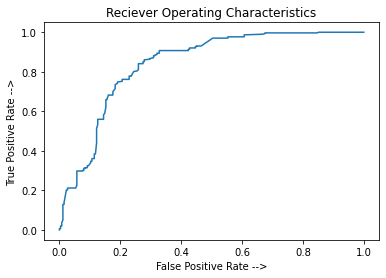

In [51]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

In [52]:
### (2) KNN regressor 

In [53]:
knn_model =KNeighborsClassifier()
knn_model.fit(x_train,y_train)
#model_name_list.append("KNN Classifier_model")

KNeighborsClassifier()

In [54]:
#DecisionTreeClassifier

In [55]:
dt_model =DecisionTreeClassifier(random_state =12)
dt_model.fit(x_train,y_train)
#model_name_list.append("Decision Regressor_model")

DecisionTreeClassifier(random_state=12)

In [56]:
rf_model = RandomForestClassifier(random_state =12)
rf_model.fit(x_train,y_train)
#model_name_list.append("Random Forest_ model")

RandomForestClassifier(random_state=12)

In [57]:
ada_model = AdaBoostClassifier(random_state =12)
ada_model.fit(x_train,y_train)
#model_name_list.append("Adaboost_ model")

AdaBoostClassifier(random_state=12)

In [58]:
knn_normal = KNeighborsClassifier()
knn_normal.fit(x_train_normal,y_train)

KNeighborsClassifier()

In [59]:
knn_std = KNeighborsClassifier()
knn_std.fit(x_train_std,y_train)

KNeighborsClassifier()

In [60]:

def train_model(x_train,y_train):
## Checking accuracy on testing data set
    y_pred_LR = logistic_model.predict(x_test)
    
    model_name_list.append("Logistic_ model")
    cnf_matrix=confusion_matrix(y_pred_LR,y_test)
    accuracy_score_LR =accuracy_score(y_pred_LR,y_test)
    clf_report_LR =classification_report(y_pred_LR,y_test)
    test_accuracy_list.append(accuracy_score_LR)
    print("Testing accuracy of Logistic regression is :",accuracy_score_LR)
    
    
## Checking accuracy on training data set
    y_pred_LR_train = logistic_model.predict(x_train)
    cnf_matrix=confusion_matrix(y_pred_LR_train,y_train)
    accuracy_score_LR =accuracy_score(y_pred_LR_train,y_train)
    clf_report_LR =classification_report(y_pred_LR_train,y_train)
    train_accuracy_list.append(accuracy_score_LR)
    print("Training accuracy of Logistic regression is :",accuracy_score_LR)
    print("-"*20)
    
## KNN Model Checking accuracy on testing data set
    y_pred_knn = knn_model.predict(x_test)
    model_name_list.append("KNN_ model")
    cnf_matrix=confusion_matrix(y_pred_knn,y_test)
    accuracy_score_knn =accuracy_score(y_pred_knn,y_test)
    clf_report_knn =classification_report(y_pred_knn,y_test)
    test_accuracy_list.append(accuracy_score_knn)
    print("Testing accuracy of KNN clasisfire is :",accuracy_score_knn)
    
## KNN Model Checking accuracy on Training  data set
    y_pred_knn_train = knn_model.predict(x_train)
    
    cnf_matrix=confusion_matrix(y_pred_knn_train,y_train)
    accuracy_train_knn =accuracy_score(y_pred_knn_train,y_train)
    clf_report_knn_train =classification_report(y_pred_LR_train,y_train)
    train_accuracy_list.append(accuracy_train_knn)
    print(" Training accuracy of KNN clasisfire is :",accuracy_train_knn)
    print("-"*20)
    
## Decision Tree Checking  accuracy on testing data set
    y_pred_DT = dt_model.predict(x_test)
    model_name_list.append("DT_ model")
    cnf_matrix = confusion_matrix(y_pred_DT,y_test)
    accuracy =accuracy_score(y_pred_DT,y_test)
    clf_report = classification_report(y_pred_DT,y_test)
    test_accuracy_list.append(accuracy)
    print("DT classifire testing accuracy is",accuracy)
    
    
## DT training accuracy 
    y_pred_DT_train = dt_model.predict(x_train)
    cnf_matrix = confusion_matrix(y_pred_DT_train,y_train)
    accuracy=accuracy_score(y_pred_DT_train,y_train)
    clf_report = classification_report(y_pred_DT_train,y_train)
    train_accuracy_list.append(accuracy)
    print(" DT classifire training accuracy is",accuracy)
    
    print("-"*20)
## Random Forest on testing
    y_pred_RF= rf_model.predict(x_test)
    model_name_list.append("RandomForest_ model")
    cnf_matrix = confusion_matrix(y_pred_RF,y_test)
    accuracy=accuracy_score(y_pred_RF,y_test)
    cnf_report=classification_report(y_pred_RF,y_test)
    test_accuracy_list.append(accuracy)
    print(" Random forest testing accuracy is",accuracy)
    
    ## Random forest on training
    
    y_pred_rf=rf_model.predict(x_train)
    cnf_matrix= confusion_matrix(y_pred_rf,y_train)
    accuracy= accuracy_score(y_pred_rf,y_train)
    cnf_report=classification_report(y_pred_rf,y_train)
    train_accuracy_list.append(accuracy)
    print(" Random forest training accuracy is",accuracy)
    print("-"*20)
    
## Adaboost on testing data
    y_pred_ada=ada_model.predict(x_test)
    model_name_list.append("Adaboost_ model")
    cnf_matrix = confusion_matrix(y_pred_ada,y_test)
    accuracy=accuracy_score(y_pred_ada,y_test)
    cnf_report = classification_report(y_pred_ada,y_test)
    test_accuracy_list.append(accuracy)
    print(" Adaboost testing accuracy is",accuracy)
    
    ## Adaboost on training
    y_pred_Ada = ada_model.predict(x_train)
    cnf_matrix =confusion_matrix(y_pred_Ada,y_train)
    accuracy=accuracy_score(y_pred_Ada,y_train)
    cnf_report=classification_report(y_pred_Ada,y_train)
    train_accuracy_list.append(accuracy)
    print("Adaboost training accuracy is", accuracy)
    print("-"*20)
    
    
    
train_model(x_train,y_train)   

Testing accuracy of Logistic regression is : 0.7304964539007093
Training accuracy of Logistic regression is : 0.7712765957446809
--------------------
Testing accuracy of KNN clasisfire is : 0.8581560283687943
 Training accuracy of KNN clasisfire is : 0.8971631205673759
--------------------
DT classifire testing accuracy is 0.8652482269503546
 DT classifire training accuracy is 0.9361702127659575
--------------------
 Random forest testing accuracy is 0.8865248226950354
 Random forest training accuracy is 0.9361702127659575
--------------------
 Adaboost testing accuracy is 0.8156028368794326
Adaboost training accuracy is 0.875886524822695
--------------------


In [61]:
### (8)Hyperparameter Tunning for Decision tree

In [62]:
dt_model =DecisionTreeClassifier(random_state=12)


hyperparameter = {"criterion":['gini', 'entropy'],
                 'max_depth':np.arange(3,8),
                 'min_samples_split': np.arange(2,20),
                 'min_samples_leaf':np.arange(2,15)}

rscv_dt_clf = RandomizedSearchCV(dt_model, hyperparameter, cv = 5)
rscv_dt_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [63]:
rscv_dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=6,
                       random_state=12)

In [64]:
## Testing 


y_pred_test= rscv_dt_clf.best_estimator_.predict(x_test)

model_name_list.append("DT with Hyperparameter tunning")

cnf_matrix=confusion_matrix(y_pred_test,y_test)
print("Confusion matrix:\n:",cnf_matrix)

accuracy =accuracy_score(y_pred_test,y_test)
print("accuracy is :",accuracy)
test_accuracy_list.append(accuracy)
clf_report =classification_report(y_pred_test,y_test)
print("classification report:\n",clf_report)







Confusion matrix:
: [[47  9]
 [12 73]]
accuracy is : 0.851063829787234
classification report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        56
           1       0.89      0.86      0.87        85

    accuracy                           0.85       141
   macro avg       0.84      0.85      0.85       141
weighted avg       0.85      0.85      0.85       141



In [65]:
y_pred_train= rscv_dt_clf.best_estimator_.predict(x_train)


cnf_matrix=confusion_matrix(y_pred_train,y_train)
print("Confusion matrix:\n:",cnf_matrix)

accuracy =accuracy_score(y_pred_train,y_train)
print("accuracy is :",accuracy)
train_accuracy_list.append(accuracy)
clf_report =classification_report(y_pred_train,y_train)
print("classification report:\n",clf_report)

Confusion matrix:
: [[203  13]
 [ 59 289]]
accuracy is : 0.8723404255319149
classification report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       216
           1       0.96      0.83      0.89       348

    accuracy                           0.87       564
   macro avg       0.87      0.89      0.87       564
weighted avg       0.89      0.87      0.87       564



In [66]:
# (9) Prunning for decision tree

In [67]:
# result = dt_model.cost_complexity_prunning_path(x_train,y_train)
# ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

In [68]:
### (8) Hyperparameter tunning for Random forest

In [69]:
rf_hyper_model = RandomForestClassifier(random_state=12,n_jobs=-1)

hyperparameter = {'n_estimators':np.arange(10,200),
                'criterion':['gini','entropy'],
                'max_depth':np.arange(3,8),
                'min_samples_split':np.arange(2,20),
                'min_samples_leaf':np.arange(3,10),
                'max_features':['sqrt','log2'],
                'oob_score':[True],
                'ccp_alpha':list(np.random.random(10))}
                             
rscv_rf_model=RandomizedSearchCV(rf_hyper_model,hyperparameter,cv=5)
rscv_rf_model.fit(x_train,y_train)

rscv_rf_model.best_estimator_
                        

RandomForestClassifier(ccp_alpha=0.8763385964187631, criterion='entropy',
                       max_depth=3, max_features='log2', min_samples_leaf=6,
                       min_samples_split=7, n_estimators=126, n_jobs=-1,
                       oob_score=True, random_state=12)

In [70]:
## testing data accuracy
model_name_list.append("RF With hyperrparameter tunning")

y_pred =rscv_rf_model.best_estimator_.predict(x_test)
cnf_matrix=confusion_matrix(y_pred,y_test)
print("Confusion matrix:\n:",cnf_matrix)

accuracy =accuracy_score(y_pred,y_test)
print("accuracy is :",accuracy)
test_accuracy_list.append(accuracy)
clf_report =classification_report(y_pred,y_test)
print("classification report:\n",clf_report)

Confusion matrix:
: [[ 0  0]
 [59 82]]
accuracy is : 0.5815602836879432
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.58      0.74       141

    accuracy                           0.58       141
   macro avg       0.50      0.29      0.37       141
weighted avg       1.00      0.58      0.74       141



In [71]:
## training data accuracy


y_pred =rscv_rf_model.best_estimator_.predict(x_train)
cnf_matrix=confusion_matrix(y_pred,y_train)
print("Confusion matrix:\n:",cnf_matrix)

accuracy =accuracy_score(y_pred,y_train)
print("accuracy is :",accuracy)
train_accuracy_list.append(accuracy)
clf_report =classification_report(y_pred,y_train)
print("classification report:\n",clf_report)

Confusion matrix:
: [[  0   0]
 [262 302]]
accuracy is : 0.5354609929078015
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70       564

    accuracy                           0.54       564
   macro avg       0.50      0.27      0.35       564
weighted avg       1.00      0.54      0.70       564



In [72]:
# Hyperparameter Tunning with Adaboost

In [73]:
adb_hyper_clf=AdaBoostClassifier(random_state=12)

hyperparameter = {'n_estimators':np.arange(10,100),
                 'learning_rate':np.arange(0,2,0.001)}
rscv_rf_model=RandomizedSearchCV(adb_hyper_clf,hyperparameter,cv=5)
rscv_rf_model.fit(x_train,y_train)

rscv_rf_model.best_estimator_


AdaBoostClassifier(learning_rate=1.301, n_estimators=51, random_state=12)

In [74]:

## Testing accuracy
model_name_list.append("AdaBoost With Hyperparameter Tunning")
y_pred = rscv_rf_model.best_estimator_.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)
print("*"*64)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score :", accuracy)
test_accuracy_list.append(accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification report :\n", clf_report)

Confusion Matrix :
 [[51  8]
 [16 66]]
****************************************************************
Accuracy Score : 0.8297872340425532
Classification report :
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        59
           1       0.89      0.80      0.85        82

    accuracy                           0.83       141
   macro avg       0.83      0.83      0.83       141
weighted avg       0.84      0.83      0.83       141



In [75]:
y_pred_train = rscv_rf_model.best_estimator_.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)
print("*"*64)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :", accuracy)
train_accuracy_list.append(accuracy)
print("*"*64)
clf_report = classification_report(y_train, y_pred_train)
print("Classification report :\n", clf_report)

Confusion Matrix :
 [[222  40]
 [ 33 269]]
****************************************************************
Accuracy Score : 0.8705673758865248
****************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       262
           1       0.87      0.89      0.88       302

    accuracy                           0.87       564
   macro avg       0.87      0.87      0.87       564
weighted avg       0.87      0.87      0.87       564



In [76]:
### KNN With Normalization scaling

In [77]:
# Testing Data
# Prediction
y_pred = knn_normal.predict(x_test)
y_pred
model_name_list.append("KNN with Normalization Scaling")
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix \n", conf_matrix)
print("*"*64)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
test_accuracy_list.append(accuracy)
print("*"*64)
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

confusion matrix 
 [[ 0 59]
 [ 0 82]]
****************************************************************
Accuracy Score: 0.5815602836879432
****************************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.58      1.00      0.74        82

    accuracy                           0.58       141
   macro avg       0.29      0.50      0.37       141
weighted avg       0.34      0.58      0.43       141



In [78]:
# Training Data
y_pred_train = knn_normal.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)
print("*"*64)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :", accuracy)
train_accuracy_list.append(accuracy)
print("*"*64)
clf_report = classification_report(y_train, y_pred_train)
print("Classification report :\n", clf_report)


Confusion Matrix :
 [[  0 262]
 [  0 302]]
****************************************************************
Accuracy Score : 0.5354609929078015
****************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.54      1.00      0.70       302

    accuracy                           0.54       564
   macro avg       0.27      0.50      0.35       564
weighted avg       0.29      0.54      0.37       564



In [79]:
# KNN with standardization

In [80]:
# Testing Data
# Prediction
y_pred = knn_std.predict(x_test)
y_pred
model_name_list.append("KNN with Standardization Scaling")
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix \n", conf_matrix)
print("*"*64)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
test_accuracy_list.append(accuracy)
print("*"*64)
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)


confusion matrix 
 [[ 0 59]
 [ 0 82]]
****************************************************************
Accuracy Score: 0.5815602836879432
****************************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.58      1.00      0.74        82

    accuracy                           0.58       141
   macro avg       0.29      0.50      0.37       141
weighted avg       0.34      0.58      0.43       141



In [81]:
# Training Data
y_pred_train = knn_std.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)
print("*"*64)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score :", accuracy)
train_accuracy_list.append(accuracy)
print("*"*64)
clf_report = classification_report(y_train, y_pred_train)
print("Classification report :\n", clf_report)

Confusion Matrix :
 [[  0 262]
 [  0 302]]
****************************************************************
Accuracy Score : 0.5354609929078015
****************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.54      1.00      0.70       302

    accuracy                           0.54       564
   macro avg       0.27      0.50      0.35       564
weighted avg       0.29      0.54      0.37       564



In [82]:
len(model_name_list)

10

In [83]:
len(test_accuracy_list)

10

In [84]:
len(train_accuracy_list)

10

In [85]:
dict={'Model_Name':model_name_list,'Testing_accuracy':test_accuracy_list,'Trainin_accuracy':train_accuracy_list}
comparison_df=pd.DataFrame(dict)
comparison_df

,Model_Name,Testing_accuracy,Trainin_accuracy
0,Logistic_ model,0.73,0.77
1,KNN_ model,0.86,0.90
2,DT_ model,0.87,0.94
3,RandomForest_ model,0.89,0.94
4,Adaboost_ model,0.82,0.88
5,DT with Hyperparameter tunning,0.85,0.87
6,RF With hyperrparameter tunning,0.58,0.54
7,AdaBoost With Hyperparameter Tunning,0.83,0.87
8,KNN with Normalization Scaling,0.58,0.54
9,KNN with Standardization Scaling,0.58,0.54


# Training on single row

In [86]:
x.head(1).T

,0
Plant,1.00
Surface,0.00
Pack,20.00
Price,9140.00
Year,2019.00
Awarded_points,87.00
Manufacturing_Plant_Bellary,1.00
Manufacturing_Plant_Vasind,0.00
Hub_Location_Aurangabad,1.00
Hub_Location_Goa,0.00


In [87]:
x.head(1).T.shape

(24, 1)

In [88]:
columns = x.columns
print(columns)


Index(['Plant', 'Surface', 'Pack', 'Price', 'Year', 'Awarded_points',
       'Manufacturing_Plant_Bellary', 'Manufacturing_Plant_Vasind',
       'Hub_Location_Aurangabad', 'Hub_Location_Goa', 'Hub_Location_Kolhapur',
       'Hub_Location_Nagpur', 'Hub_Location_Nashik', 'Brand_AE', 'Brand_AI',
       'Brand_ASI', 'Brand_EWP', 'Brand_HE', 'Brand_HI', 'Brand_HSI',
       'Brand_IBWPE', 'Brand_IBWPI', 'Brand_IBWR', 'Brand_IWP'],
      dtype='object')


In [89]:
len(columns)


24

In [90]:
print(Plant_dict)
print(Surface_dict)


{'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
{'INTERIOR': 0, 'EXTERIOR': 1}


In [91]:
Plant = 'One'
Surface = 'INTERIOR'
Pack = 20
Price= 9140
Year= 2019
Awarded_points= 87


# one hot encoded 
Manufacturing_Plant = "Bellary"
Hub_Location = "Aurangabad"
Brand = "ASI"


In [92]:
Manufacturing_Plant_col = "Manufacturing_Plant_" + Manufacturing_Plant
Hub_Location_col = "Hub_Location_" + Hub_Location
Brand_col = "Brand_" + Brand

print(Manufacturing_Plant_col)
print(Hub_Location_col)
print(Brand_col)



Manufacturing_Plant_Bellary
Hub_Location_Aurangabad
Brand_ASI


In [93]:
columns

Index(['Plant', 'Surface', 'Pack', 'Price', 'Year', 'Awarded_points',
       'Manufacturing_Plant_Bellary', 'Manufacturing_Plant_Vasind',
       'Hub_Location_Aurangabad', 'Hub_Location_Goa', 'Hub_Location_Kolhapur',
       'Hub_Location_Nagpur', 'Hub_Location_Nashik', 'Brand_AE', 'Brand_AI',
       'Brand_ASI', 'Brand_EWP', 'Brand_HE', 'Brand_HI', 'Brand_HSI',
       'Brand_IBWPE', 'Brand_IBWPI', 'Brand_IBWR', 'Brand_IWP'],
      dtype='object')

In [94]:
Manufacturing_Plant_index = np.where (columns == Manufacturing_Plant_col)[0][0]
Hub_Location_index = np.where(columns == Hub_Location_col)[0][0]
Brand_index = np.where(columns == Brand_col)[0][0]

print(Manufacturing_Plant_index)
print(Hub_Location_index)
print(Brand_index)


6
8
15


In [95]:
array = np.zeros(len(columns),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [96]:
array[0] = Plant_dict[Plant]
array[1] = Surface_dict[Surface]
array[2] = Pack
array[3] = Price
array[4] = Year
array[5] = Awarded_points


array[Manufacturing_Plant_index] = 1
array[Hub_Location_index] = 1
array[Brand_index] = 1

array

array([   1,    0,   20, 9140, 2019,   87,    1,    0,    1,    0,    0,
          0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    0])

In [106]:
coupon_prediction = rf_model.predict([array])[0]
if coupon_prediction == 1:
    print('As per the provided inputs deatils product Barcode/coupon code is valid.')
else:
    print('As per the provided inputs deatils product Barcode/coupon code is invalid.')

As per the provided inputs deatils product Barcode/coupon code is valid.


In [107]:
# store all this column is json 
coupon_data = {"columns":list(columns)}
coupon_data


{'columns': ['Plant',
  'Surface',
  'Pack',
  'Price',
  'Year',
  'Awarded_points',
  'Manufacturing_Plant_Bellary',
  'Manufacturing_Plant_Vasind',
  'Hub_Location_Aurangabad',
  'Hub_Location_Goa',
  'Hub_Location_Kolhapur',
  'Hub_Location_Nagpur',
  'Hub_Location_Nashik',
  'Brand_AE',
  'Brand_AI',
  'Brand_ASI',
  'Brand_EWP',
  'Brand_HE',
  'Brand_HI',
  'Brand_HSI',
  'Brand_IBWPE',
  'Brand_IBWPI',
  'Brand_IBWR',
  'Brand_IWP']}

In [108]:
import json
with open("coupon_data.json", "w") as f:
 json.dump(coupon_data, f)


In [110]:
# Save Model in Pickle File
import pickle
with open("rf_model.pkl", "wb") as f:
 pickle.dump(rf_model, f)